In [1]:
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt


def random_strategy(success_counts, fail_counts):
    """
    Random strategy for arm selection.
    It selects an arm randomly irrespective of its success or failure history.
    """
    return np.random.choice(len(success_counts))


def baysian_ucb_strategy(success_counts, fail_counts, q=0.95):
    """
    Bayesian Upper Confidence Bound strategy for arm selection.
    It prefers arms with high uncertainty and high reward.
    """
    score = scipy.stats.beta.ppf(q, success_counts + 1, fail_counts + 1)
    return np.argmax(score)


def ucb1_strategy(success_counts, fail_counts):
    """
    UCB1 strategy for arm selection.
    It balances the exploration and exploitation based on average reward and count of selections.
    """
    mean = (success_counts) / (success_counts + fail_counts)
    total_count = np.sum(success_counts + fail_counts)
    ucb = (
            2.0 * np.log(total_count) / (success_counts + fail_counts)
          ) ** 0.5
    score = mean + ucb
    return np.argmax(score)


def softmax_strategy(success_counts, fail_counts, t=0.05):
    """
    Softmax strategy for arm selection.
    It uses the average reward of each arm to compute a probability distribution and selects an arm based on the distribution.
    """
    mean = (success_counts) / (success_counts + fail_counts + 1e-10)
    select_rate = np.exp(mean / t) / np.sum(np.exp(mean / t))
    return np.random.choice(len(select_rate), p=select_rate)


def softmax_annealing_strategy(success_counts, fail_counts, initial_t=0.1, k=100.0):
    """
    Softmax Annealing strategy for arm selection.
    It is similar to softmax strategy but it reduces the temperature over time, encouraging more exploitation of the best arm.
    """
    mean = (success_counts) / (success_counts + fail_counts)
    t = initial_t / np.log(k * np.sum(success_counts + fail_counts) + 2)
    select_rate = np.exp(mean / t) / np.sum(np.exp(mean / t))
    return np.random.choice(len(select_rate), p=select_rate)


def thompson_sampling_strategy(success_counts, fail_counts):
    """
    Thompson Sampling strategy for arm selection.
    It uses a Beta distribution to model the success probability of each arm and selects the arm with the highest sampled probability.
    """
    score = scipy.stats.beta.rvs(success_counts + 1, fail_counts + 1)
    return np.argmax(score)

Random 0.1115
Baysian_UCB 0.116
UCB1 0.1144
Softmax 0.1164
Softmax_annealing 0.1198
Thompson_sampling 0.1162


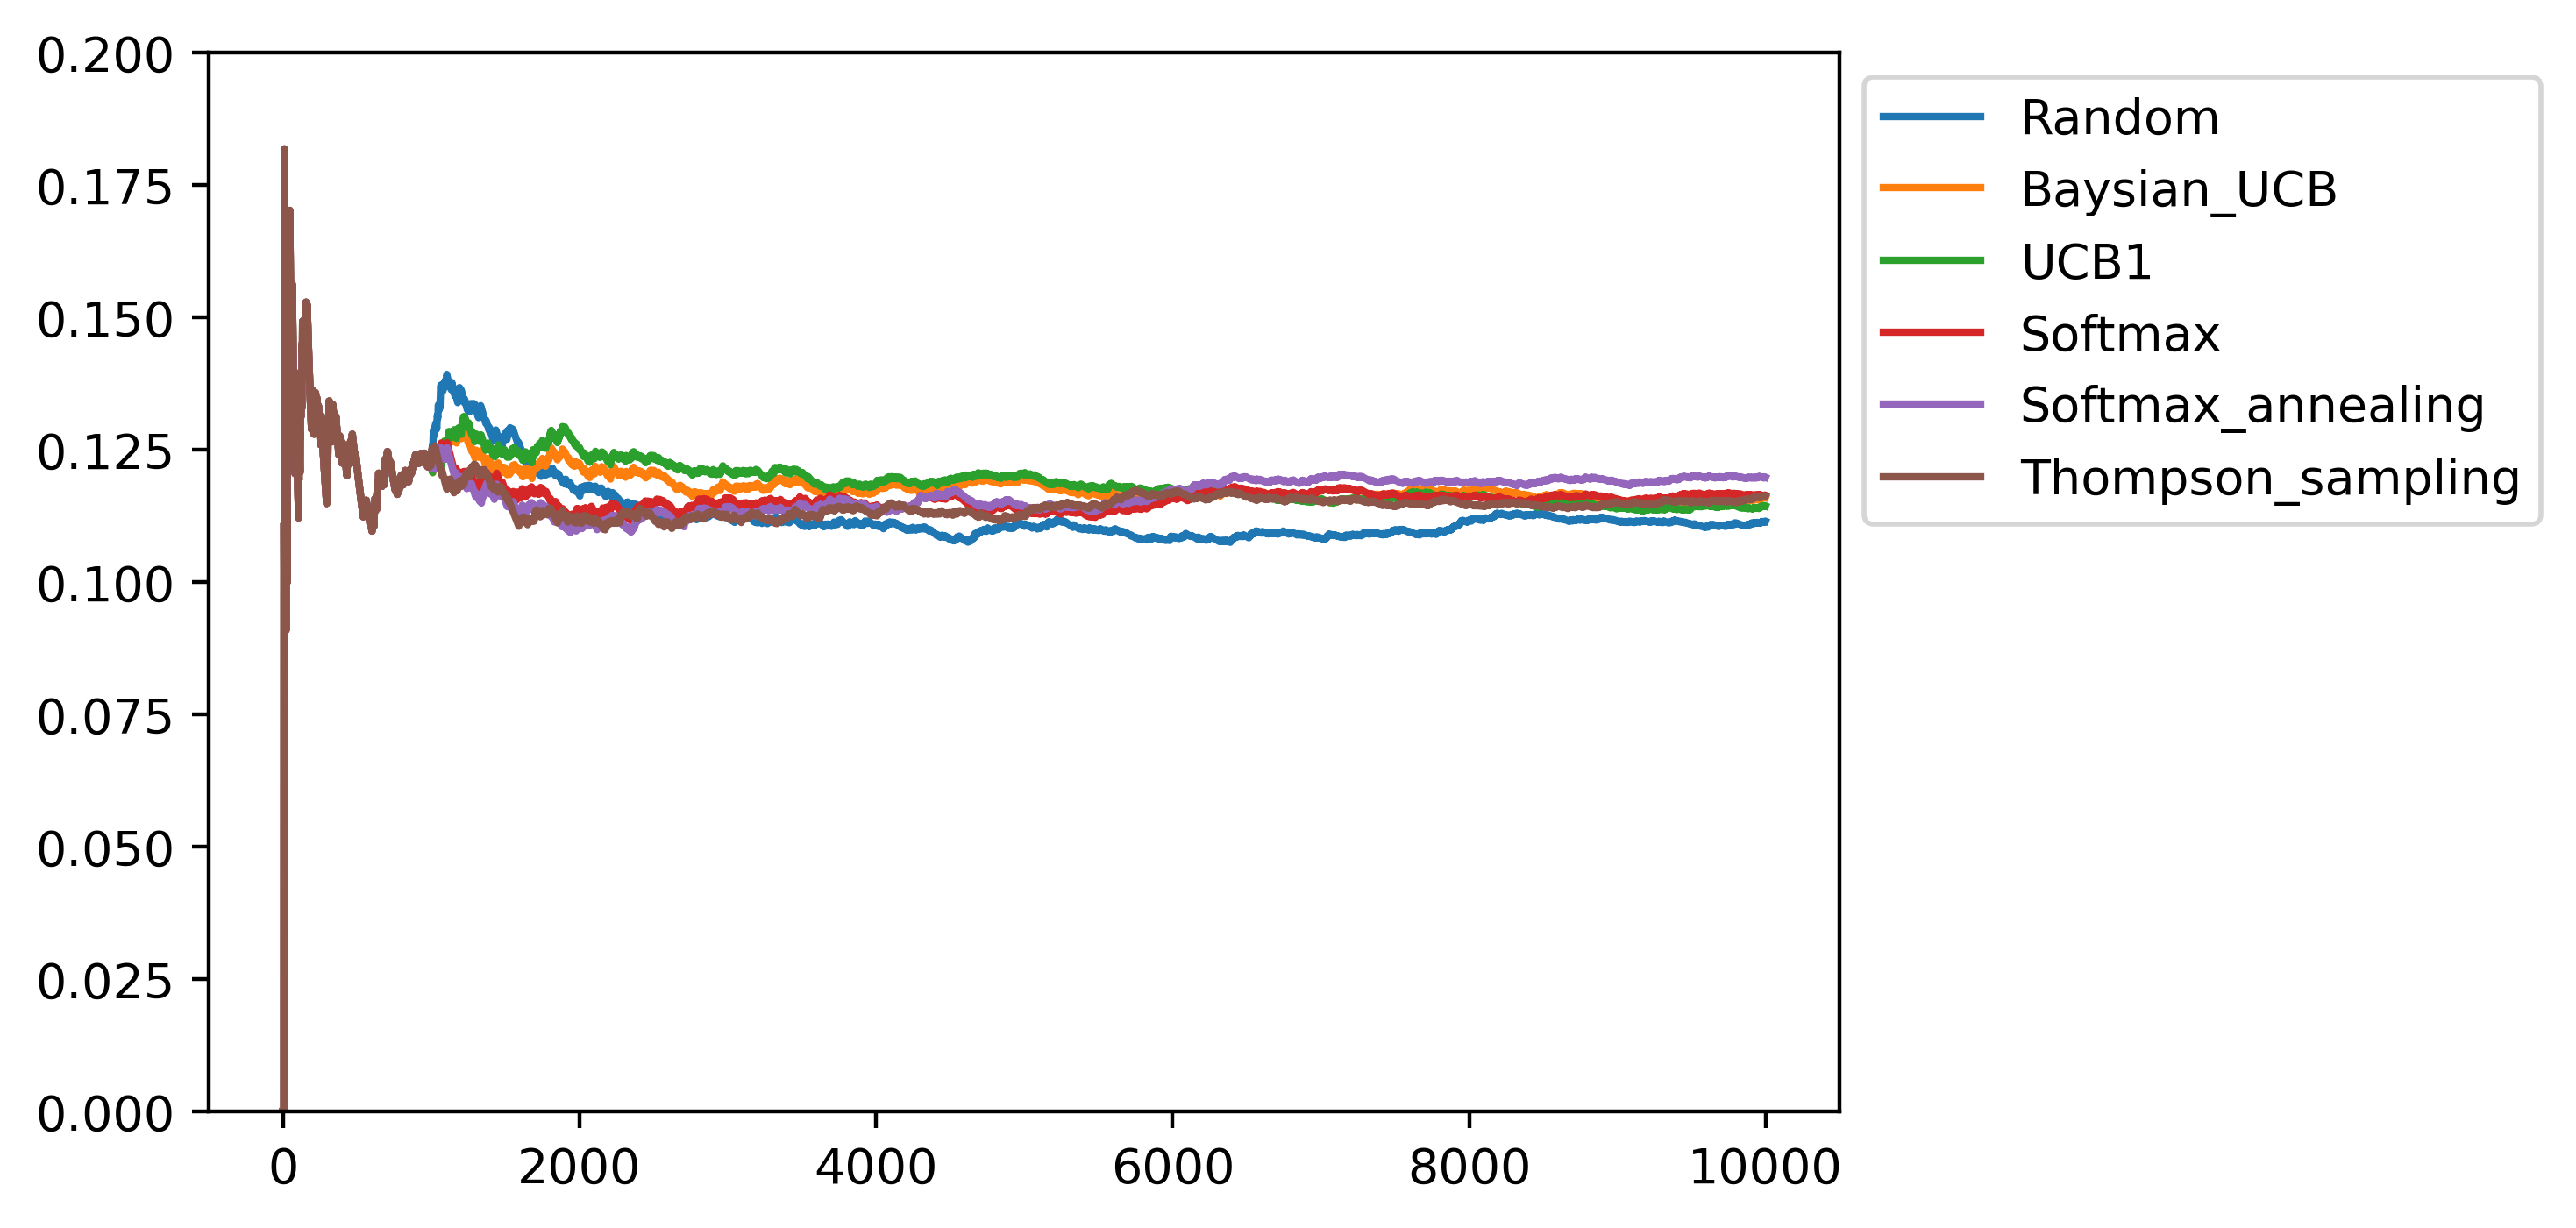

Random 0.3335
Baysian_UCB 0.4422
UCB1 0.3881
Softmax 0.3459
Softmax_annealing 0.5624
Thompson_sampling 0.6684


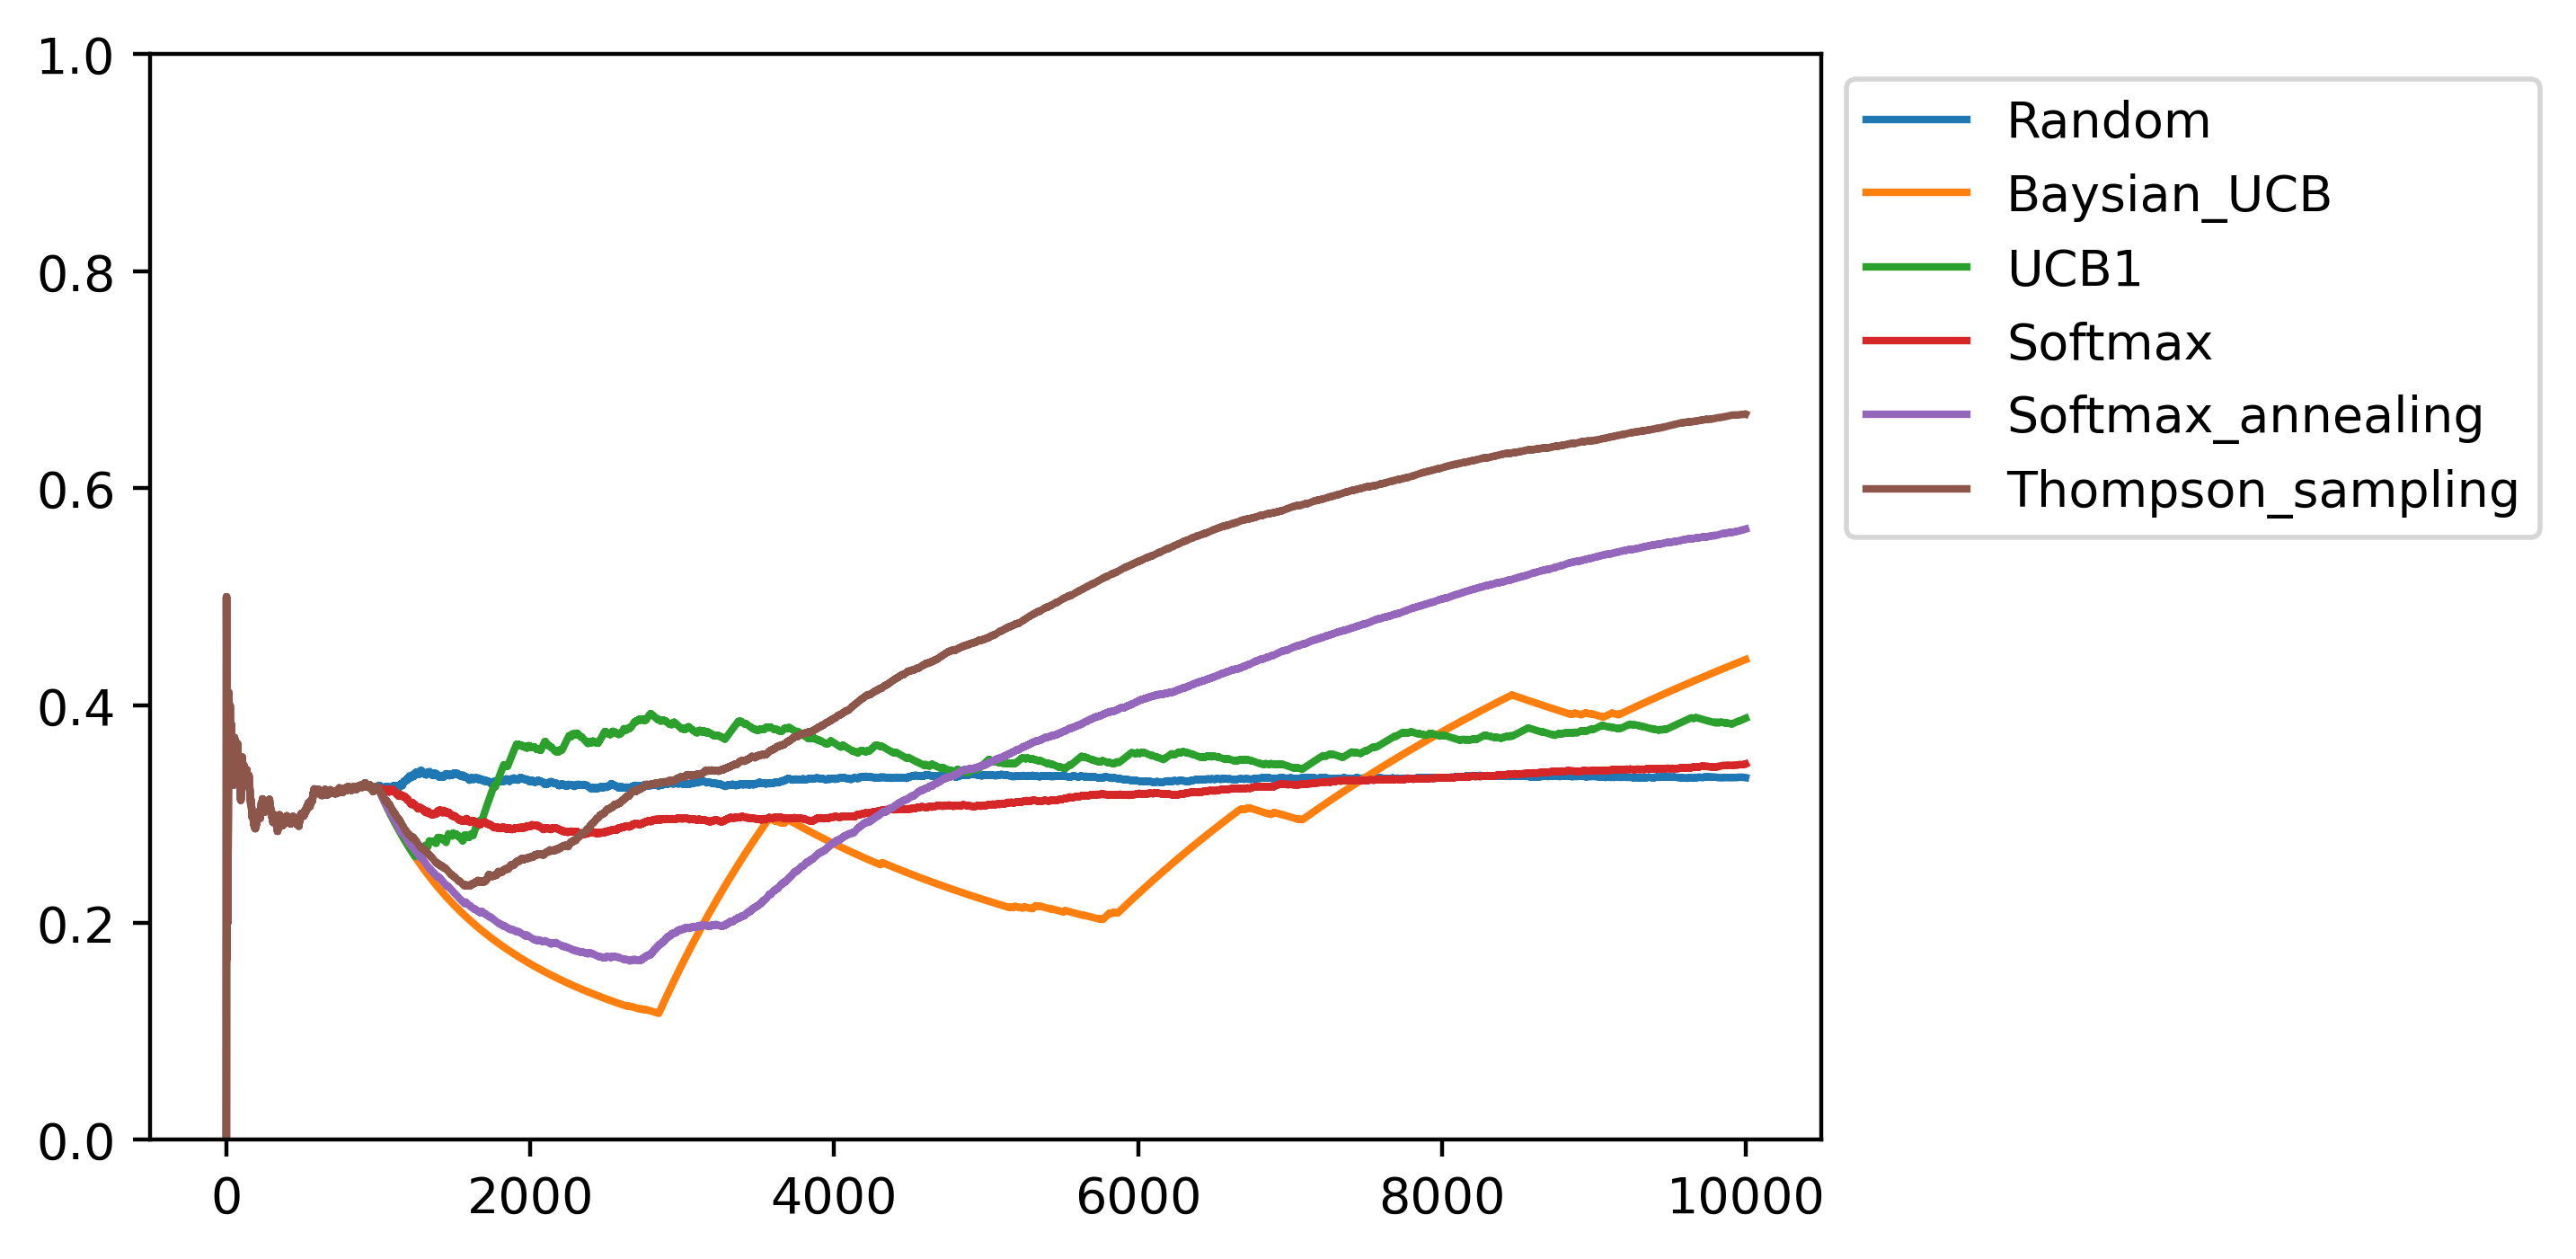

In [2]:
    actual_cvr = [0.12, 0.11, 0.10]
    bandit_round = 10000
    #random_seed = 1234567
    random_seed = 1234

    strategy_list = [
        ("Random", random_strategy),
        ("Baysian_UCB", baysian_ucb_strategy),
        ("UCB1", ucb1_strategy),
        ("Softmax", softmax_strategy),
        ("Softmax_annealing", softmax_annealing_strategy),
        ("Thompson_sampling", thompson_sampling_strategy)
    ]

    scores = []
    arm1_select_rates = []

    for name, select_arm_method in strategy_list:
        # random seed를 초기화한다
        # scipy는 numpy의 난수를 사용하므로 scipy도 동시에 초기화할 수 있다
        np.random.seed(random_seed)

        success_counts = np.array([0.0, 0.0, 0.0])
        fail_counts = np.array([0.0, 0.0, 0.0])
        
        scores.append([])
        arm1_select_rates.append([])
        
        for i in range(bandit_round):
            if i < 1000:  # 최초 1,000 라운드는 무작위로 송신한다
                selected_arm = random_strategy(success_counts, fail_counts)
            else:
                selected_arm = select_arm_method(success_counts, fail_counts)

            # 선택한 팔의 컨버전 여부 판정
            if np.random.rand() < actual_cvr[selected_arm]:
                success_counts[selected_arm] += 1
            else:
                fail_counts[selected_arm] += 1
            
            score = np.sum(success_counts) / np.sum(success_counts + fail_counts)
            scores[-1].append(score)
            
            arm1_select_rate = (success_counts[0] + fail_counts[0]) / np.sum(success_counts + fail_counts)
            arm1_select_rates[-1].append(arm1_select_rate)


    plt.figure(dpi=400)
    for i in range(len(strategy_list)):
        algorithm_name = strategy_list[i][0] 
        print(algorithm_name, scores[i][-1])
        plt.plot(scores[i], label=algorithm_name)
        plt.ylim(0.0, 0.2)

    plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
    plt.show()


    plt.figure(dpi=400)
    for i in range(len(strategy_list)):
        algorithm_name = strategy_list[i][0] 
        print(algorithm_name, arm1_select_rates[i][-1])
        plt.plot(arm1_select_rates[i], label=algorithm_name)
        plt.ylim(0, 1)

    plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
    plt.show()